# Preprocessing For Correlation

In [4]:
import pandas as pd # import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
%pwd

'/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector'

In [6]:
%cd CSV_file_from_2007_to_2017

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [7]:
%ls

EasternRegion_CO_airpointers.csv    WesternRegion_CO_airpointers.csv
EasternRegion_NO2_airpointers.csv   WesternRegion_NO2_airpointers.csv
EasternRegion_O3_airpointers.csv    WesternRegion_O3_airpointers.csv
EasternRegion_PM10_airpointers.csv  WesternRegion_PM10_airpointers.csv
EasternRegion_PM25_airpointers.csv  WesternRegion_PM25_airpointers.csv
EasternRegion_SO2_airpointers.csv   WesternRegion_SO2_airpointers.csv
SkopjeRegion_CO_airpointers.csv     data.xlsx
SkopjeRegion_NO2_airpointers.csv    newfile.xlsx
SkopjeRegion_O3_airpointers.csv     outfile
SkopjeRegion_PM10_airpointers.csv   outfile1
SkopjeRegion_PM25_airpointers.csv   processed_with_columns_droped.csv
SkopjeRegion_SO2_airpointers.csv    raw_processed.csv


In [8]:
pollution_PM = pd.read_csv("SkopjeRegion_PM10_airpointers.csv") #load data set
pollution_PM=pollution_PM.rename(columns = {'DATE_TIME;LAT;LON;PM10;NAME':'pm10'})#rename
df_ = pd.DataFrame(pollution_PM.pm10.str.split(';',4).tolist(),columns = ['date','Lat','Lon','PM10','NAME'])

In [9]:
pollution_PM = pd.read_csv("SkopjeRegion_PM10_airpointers.csv") #load data set
pollution_PM=pollution_PM.rename(columns = {'DATE_TIME;LAT;LON;PM10;NAME':'pm10'})#rename


## Plot PM10

In [10]:
#  Missing Values 
df_.isnull().sum() # No null value reported because PM10 is of  object type

date    0
Lat     0
Lon     0
PM10    0
NAME    0
dtype: int64

In [11]:
df_['PM10']= pd.to_numeric(df_['PM10']) # Convert PM_10 column to Numeric Values

In [12]:
df_.isnull().sum() # Total number of Null values

date         0
Lat          0
Lon          0
PM10    255713
NAME         0
dtype: int64

In [13]:
print("Total Number of PM10 with zero values: ",df_['PM10'].loc[df_['PM10'] == 0.0].size) # Total Number of Pm10 with zero values

Total Number of PM10 with zero values:  27


In [14]:
df_['PM10'].replace('NaN', np.NaN)[1:3] #replace NAn with zero np.nan

1      NaN
2    61.67
Name: PM10, dtype: float64

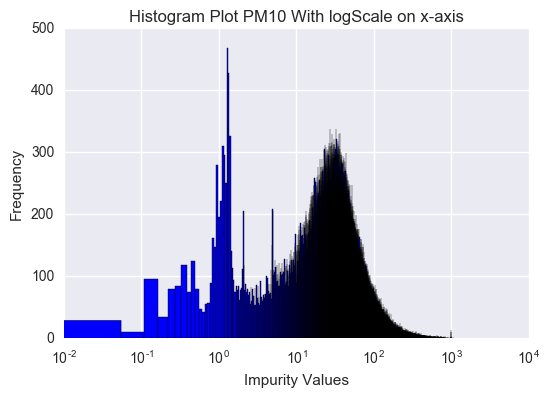

In [15]:
fig, ax = plt.subplots()
df_.PM10.hist(ax=ax,bins=20000,color='blue',bottom=0.1)
#ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Histogram Plot PM10 With logScale on x-axis")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")


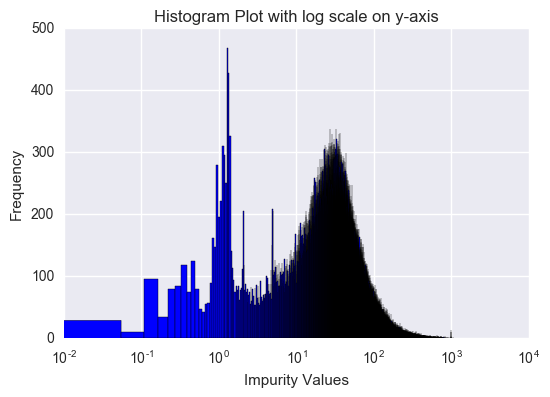

In [15]:
fig, ax = plt.subplots()
df_.PM10.hist(ax=ax,bins=20000,color='blue',bottom=0.1)
ax.set_xscale('log')
plt.title("Histogram Plot with log scale on y-axis")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")


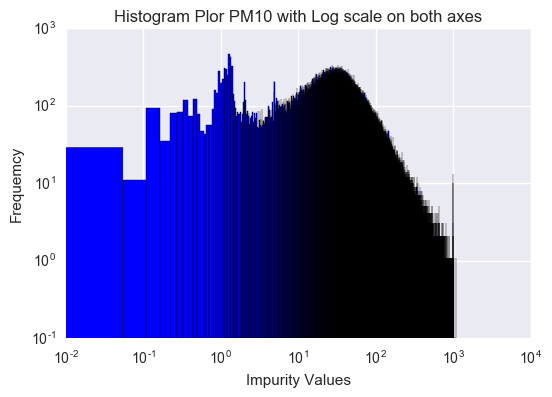

In [16]:
fig, ax = plt.subplots()
df_.PM10.hist(ax=ax,bins=20000,color='blue',bottom=0.1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Histogram Plor PM10 with Log scale on both axes")
plt.ylabel("Frequemcy")
plt.xlabel("Impurity Values")


## Sort data According to date 

In [16]:
df_.date = pd.to_datetime(df_.date) # convert date to date time datatype

In [17]:
df_Sorted = df_.sort_values(by='date',ascending=True)

In [18]:
df_Sorted.head()

,date,Lat,Lon,PM10,NAME
9414,2007-01-02,41.987500,21.652500,NaN,Miladinovci
9408,2007-01-02,41.992500,21.423611,NaN,Centar
9411,2007-01-02,41.977821,21.464474,NaN,Lisice
9412,2007-01-02,41.999200,21.440800,204.92,Rektorat
9413,2007-01-02,42.015800,21.650600,NaN,Mrsevci


In [ ]:
df_Sorted.dtypes

date    datetime64[ns]
Lat             object
Lon             object
PM10           float64
NAME            object
dtype: object

<b> Drop Columns Lat, Lon and Name </b>

In [13]:
df_Sorted.drop(['Lat','Lon','NAME'], axis = 1, inplace = True, errors = 'ignore')

In [14]:
df_Sorted[1:7]


,date,PM10
9408,2007-01-02,NaN
9411,2007-01-02,NaN
9412,2007-01-02,204.92
9413,2007-01-02,NaN
9409,2007-01-02,NaN
4977,2007-01-02,NaN


<b> Plots with Sorted Data</b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159fce80>]], dtype=object)

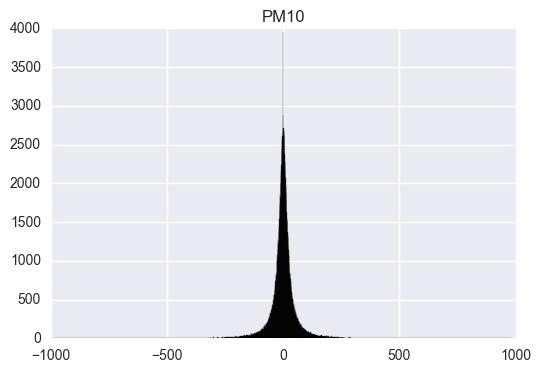

In [15]:
df_Sorted.diff().hist(color='k', alpha=0.7, bins=3000)
#Histogram plot

<b> Sort Values According to Occurence </b>

In [95]:
df_Sorted.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,370787.000000
mean,75.526098
std,86.283927
min,0.000000
25%,NaN
50%,NaN
75%,NaN
max,1093.080000


In [19]:
df_Sorted['PM10'].value_counts().max() # maximum count

125

In [20]:
df_Sorted['PM10'].value_counts().idxmax() # value with max count

1.3200000000000001

In [21]:
df_Sorted['PM10'] = np.log(df_Sorted['PM10'])

<b> Autcorrelation plot for After log conversion </b>

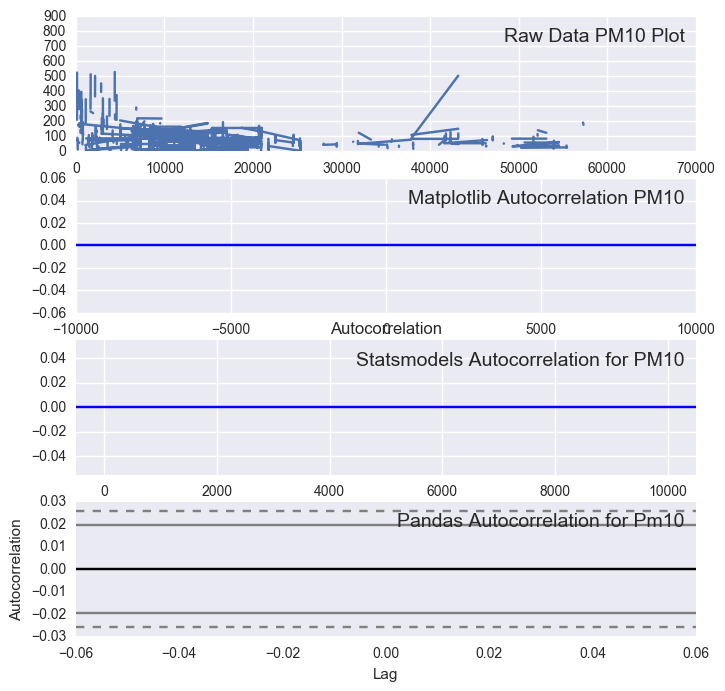

In [20]:
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics import tsaplots
fig, axes = plt.subplots(nrows=4, figsize=(8, 8))
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
axes[0].plot(df_Sorted.PM10[1:10000])
label(axes[0],'Raw Data PM10 Plot')

axes[1].acorr(df_Sorted.PM10[1:100000], maxlags=df_Sorted.PM10[1:10000].size-30)
label(axes[1], 'Matplotlib Autocorrelation PM10')
print('\n')

tsaplots.plot_acf(df_Sorted.PM10[1:10000], axes[2])
label(axes[2], 'Statsmodels Autocorrelation for PM10')

pd.tools.plotting.autocorrelation_plot(df_Sorted.PM10[1:10000], ax=axes[3])
label(axes[3], 'Pandas Autocorrelation for Pm10')


plt.show()

In [23]:
df_Sorted['PM10'].value_counts().max() # maximum count

125

In [24]:
df_Sorted['PM10'].value_counts().idxmax() # value with max count

0.27763173659827955

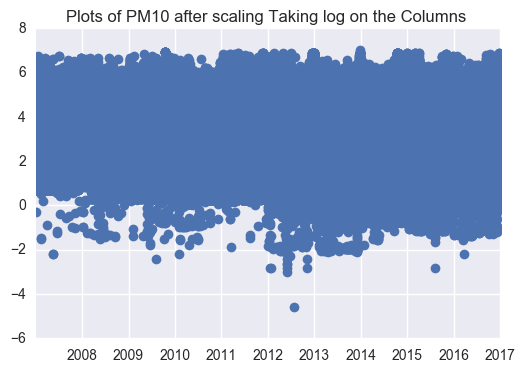

In [30]:
plt.plot_date(x=df_Sorted.date, y=df_Sorted.PM10.values)
plt.title("Plots of PM10 after scaling Taking log on the Columns ")
plt.show()


In [26]:
df_t=pd.DataFrame({ 'x':range(30) })

In [35]:
df_t[0:9].mean()

x    4.0
dtype: float64

In [37]:
df_indexed_with_date =df_Sorted.set_index('date')

In [43]:
df_indexed_with_date[0:0]

,PM10
date,


In [44]:
del df_indexed_with_date.index.name # delete index name


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1251c1f28>], dtype=object)

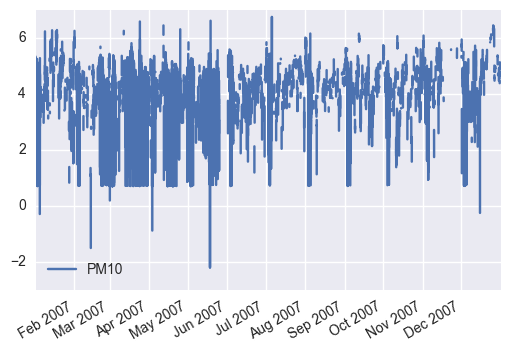

In [49]:
df_indexed_with_date['2007':'2007'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115da31d0>], dtype=object)

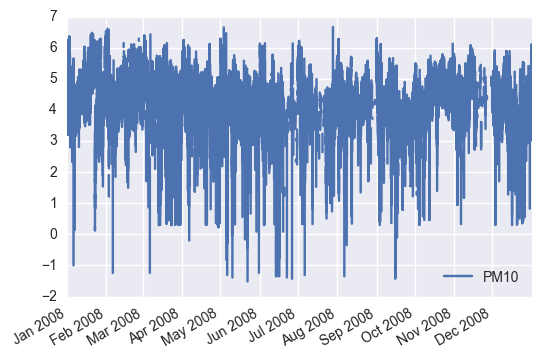

In [51]:
df_indexed_with_date['2008':'2008'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1251c7978>], dtype=object)

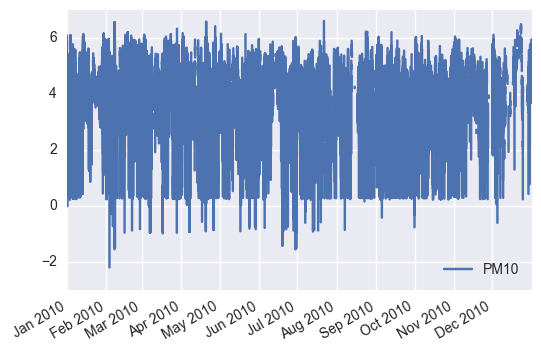

In [52]:
df_indexed_with_date['2010':'2010'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x136e1c358>], dtype=object)

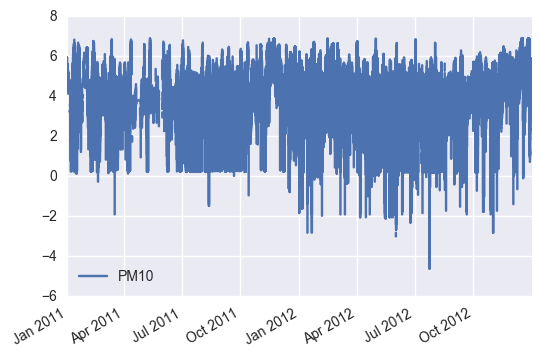

In [111]:
df_indexed_with_date['2011':'2012'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x163e8aa58>], dtype=object)

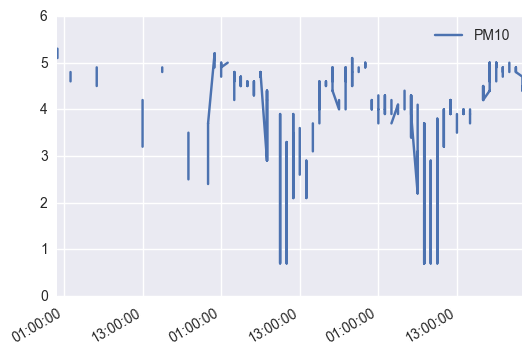

In [253]:
df_indexed_with_date['2007-01-02 00:00:00':'2007-01-04 23:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x163fd8828>], dtype=object)

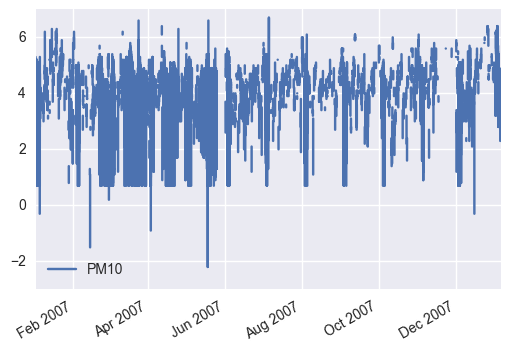

In [255]:
df_indexed_with_date['2007-01-02 00:00:00':'2008-01-05 15:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x18ff2c860>], dtype=object)

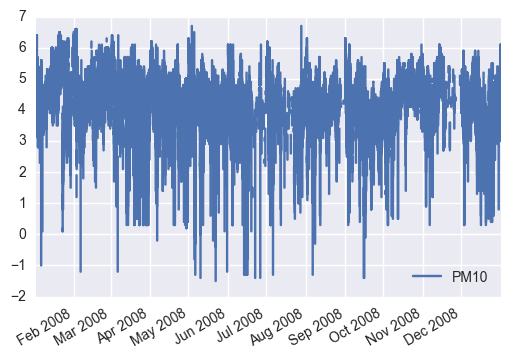

In [406]:
df_indexed_with_date['2008-01-02 00:00:00':'2008-12-31 23:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1900023c8>], dtype=object)

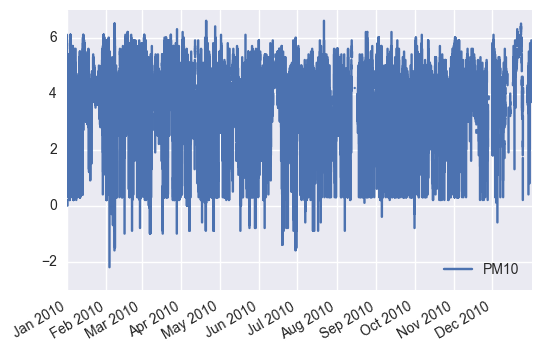

In [408]:
df_indexed_with_date['2010-01-01 00:00:00':'2010-12-31 23:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x18fe4ca90>], dtype=object)

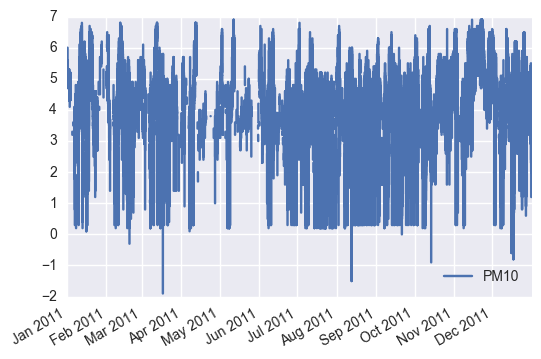

In [413]:
df_indexed_with_date['2011-01-01 00:00:00':'2011-12-31 23:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x195387eb8>], dtype=object)

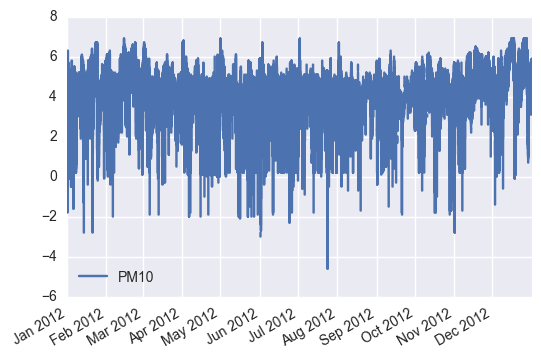

In [415]:
df_indexed_with_date['2012-01-01 00:00:00':'2012-12-31 23:00:00'].plot(subplots=True)

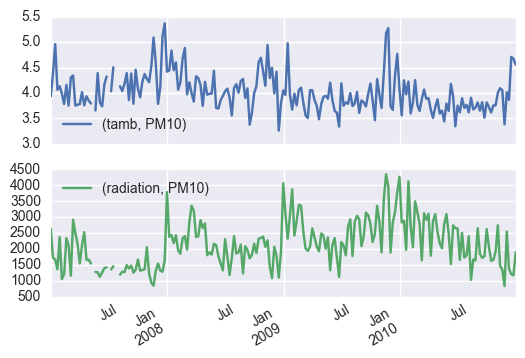

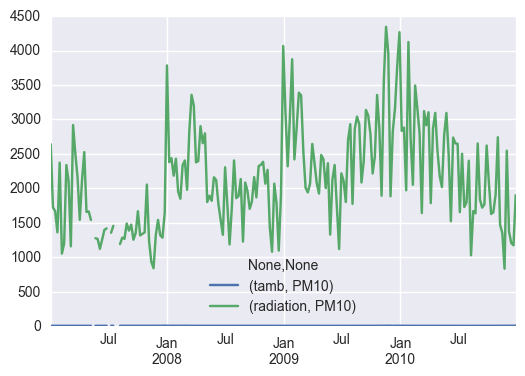

In [260]:
AO_mm=df_indexed_with_date.resample('7D').agg({'radiation': np.sum, 'tamb': np.mean})
AO_mm['2007':'2010'].plot(subplots=True)
AO_mm['2007':'2010'].plot()


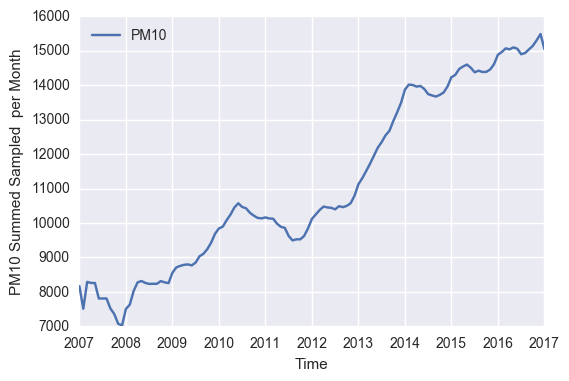

In [99]:
df_indexed_with_date.resample("1M").sum().rolling(window=30, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per Month')

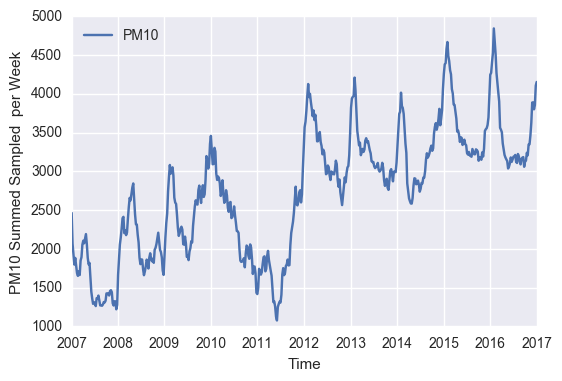

In [100]:
df_indexed_with_date.resample("1W").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per Week')

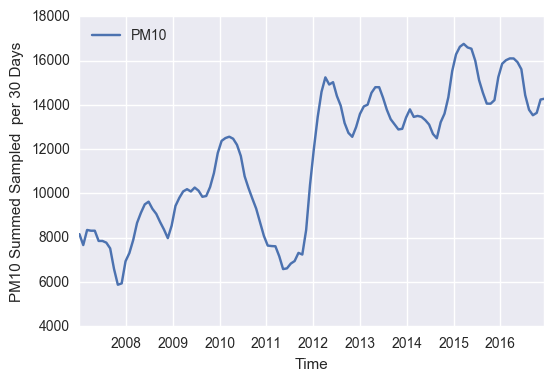

In [105]:
df_indexed_with_date.resample("30D").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per 30 Days')

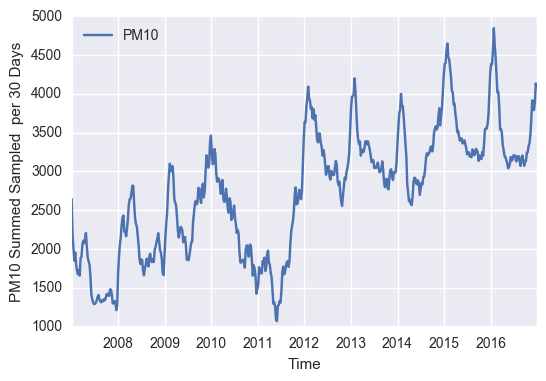

In [106]:
df_indexed_with_date.resample("7D").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per 7 Days')

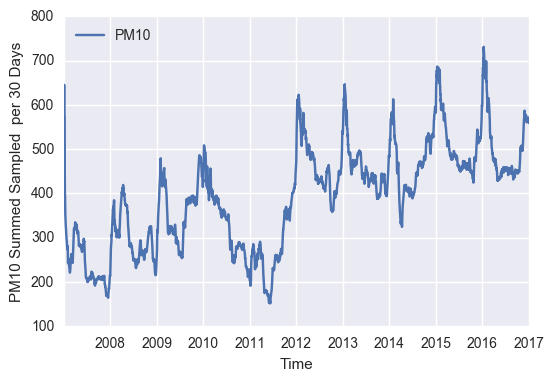

In [107]:
df_indexed_with_date.resample("1D").sum().rolling(window=30, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per 30 Days')

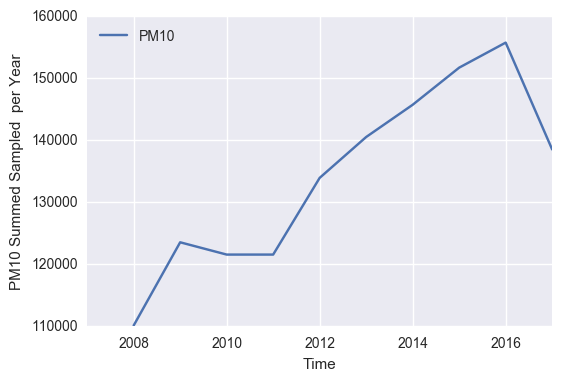

In [261]:
df_indexed_with_date.resample("1A").sum().rolling(window=30, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per Year')

# Autocorrelation For 2007

In [460]:
df_indexed_with_date['2007'].size

62482

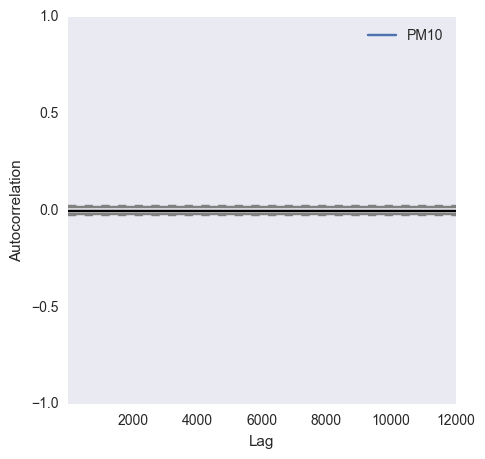

In [488]:
#No autocorrelation in this region for 2007
# probably it is the region with big missing values
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)

_ = autocorrelation_plot(df_indexed_with_date['2007'].fillna(0)[25000:37000], label='PM10')
_ = plt.legend(loc='upper right')

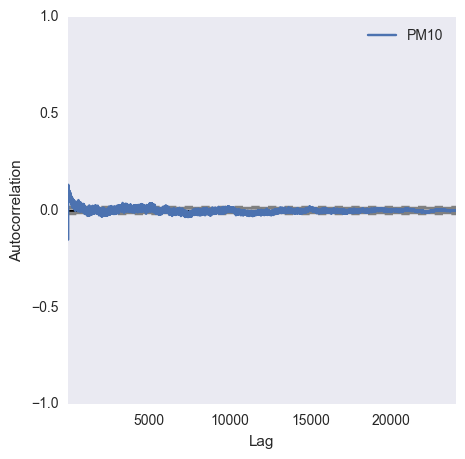

In [498]:

# Change index for 2007 to get some autocorrelation
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)

_ = autocorrelation_plot(df_indexed_with_date['2007'].fillna(0)[0:24000], label='PM10')
_ = plt.legend(loc='upper right')

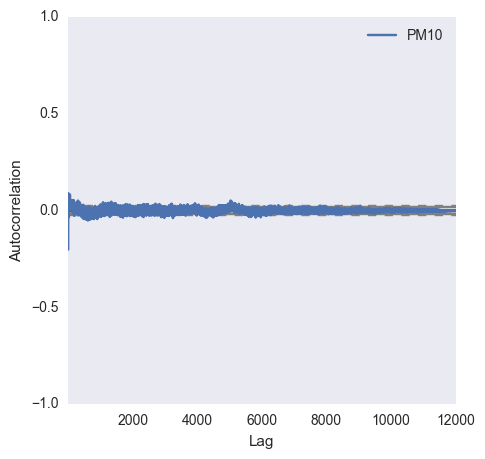

In [500]:
# Change index of frame to see 2007 to get some autocorrelation
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)

_ = autocorrelation_plot(df_indexed_with_date['2007'].fillna(0)[38000:50000], label='PM10')
_ = plt.legend(loc='upper right')

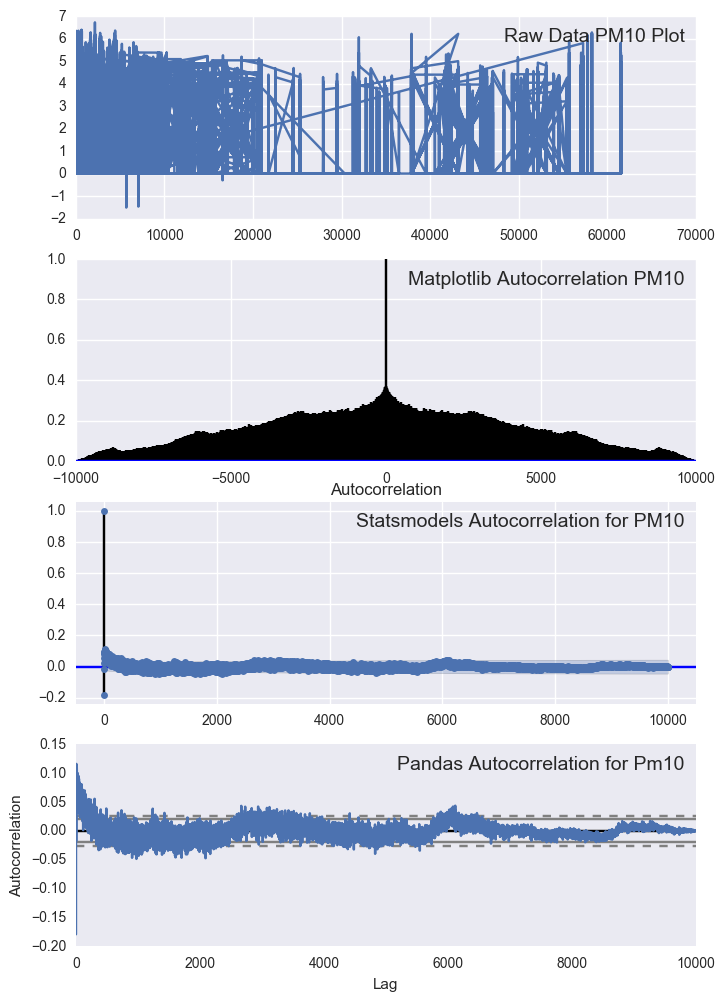

In [567]:
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics import tsaplots
fig, axes = plt.subplots(nrows=4, figsize=(8, 12))
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
axes[0].plot(df_Sorted.PM10.fillna(0)[0:10000])
label(axes[0],'Raw Data PM10 Plot')

axes[1].acorr(df_Sorted.PM10.fillna(0)[1:10000], maxlags=df_Sorted.PM10[0:10000].size-30)
label(axes[1], 'Matplotlib Autocorrelation PM10')
print('\n')

tsaplots.plot_acf(df_Sorted.PM10.fillna(0)[1:10000], axes[2])
label(axes[2], 'Statsmodels Autocorrelation for PM10')

pd.tools.plotting.autocorrelation_plot(df_Sorted.PM10.fillna(0)[0:10000], ax=axes[3])
label(axes[3], 'Pandas Autocorrelation for Pm10')


plt.show()

In [141]:
#df_indexed_with_date =df_indexed_with_date.round({'PM10':1});

In [501]:
# Autocorrelation with specific lag  Note: Nan returned
# 2007 contains a lot of null calues
df_indexed_with_date.PM10['2007'].fillna(0).autocorr(lag=1000)

nan

# Autocorrelation for 2008

In [502]:
# we can manually track the beginning and end of years 2007 and 2008

In [496]:
df_indexed_with_date.PM10['2007':'2007'].count().sum()

20099

In [179]:
df_indexed_with_date.PM10['2008':'2008'].count().sum()

26578

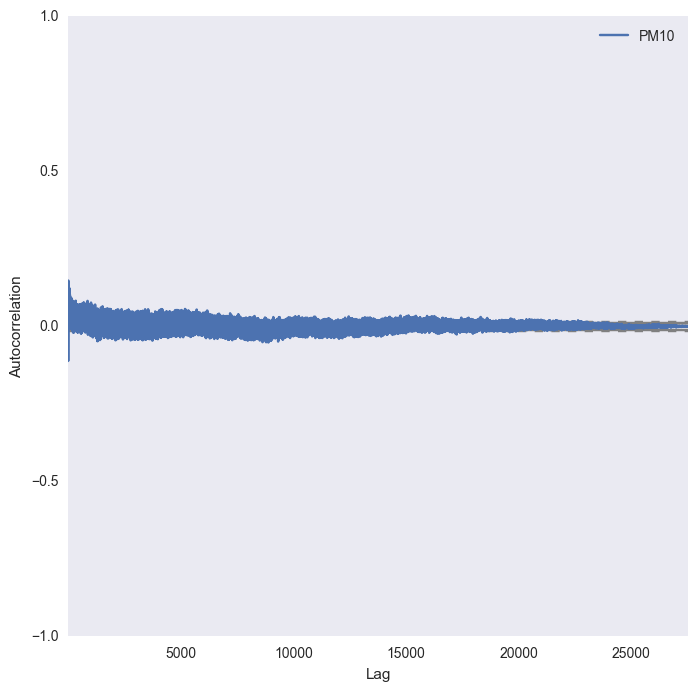

In [503]:
# Note we use the sorted data frame that does not have date as index here
# Then we feed in index values from the previous 2 cells above
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)


_ = autocorrelation_plot(df_Sorted['PM10'].fillna(0)[62481:90000], label='PM10')
_ = plt.legend(loc='upper right')


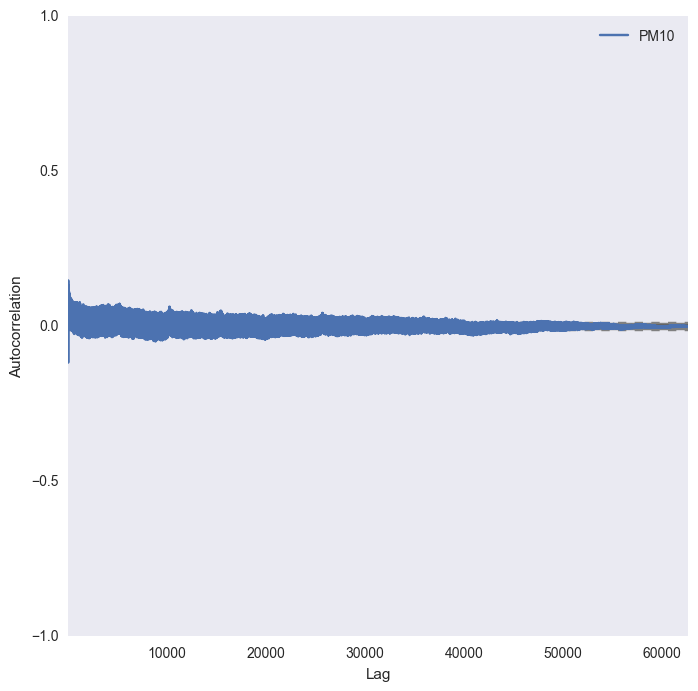

In [420]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

# we can just use 2008 oon the df_indexed_with_date as below. Same result obtained
_ = autocorrelation_plot(df_indexed_with_date['2008'].fillna(0), label='PM10')
_ = plt.legend(loc='upper right')


In [524]:
df_indexed_with_date.PM10['2008'].fillna(0).autocorr(lag=1000)

0.048255937571262245

In [ ]:
 In general, we should test for autocorrelation at lags one to lag n/4, where n is the total number of observations in the analysis. Estimates at longer lags have been shown to be statistically unreliable (Box and Jenkins, 1970).



# AutoCorrelation plot for 2009-2016

In [294]:
print (df_Sorted.date[df_Sorted.date=='2009'][0:1])
df_Sorted.date[df_Sorted.date=='2010'][0:1]

121062   2009-01-01
Name: date, dtype: datetime64[ns]


184015   2010-01-01
Name: date, dtype: datetime64[ns]

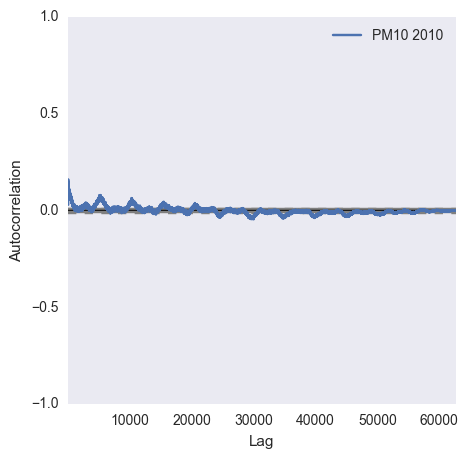

In [505]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2010'].fillna(0), label='PM10 2010')
_ = plt.legend(loc='upper right')


In [525]:
df_indexed_with_date.PM10['2009'].fillna(0).autocorr(lag=1000)

0.04327033573993741

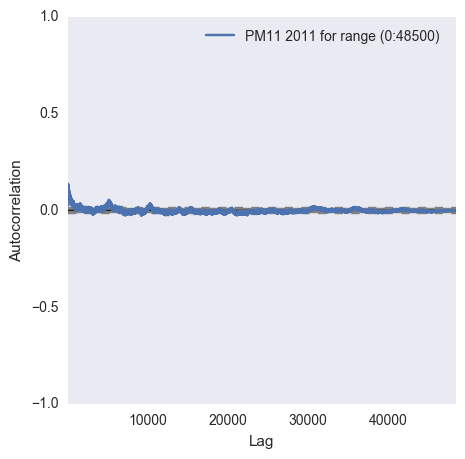

In [568]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2011'][0:48500].fillna(0), label='PM11 2011 for range (0:48500) ')
_ = plt.legend(loc='upper right')


In [ ]:
# We will locate the values for 2011  from the index.  We will observe the same
# correlation as above. ( where both ends.)
# To do this we will locate the first value for 2011 and last value 2012
# And The from there we will add index value to get the plot above  for autocorrelation
# Then another plot for the zero correlation

In [642]:
print (df_Sorted.date[df_Sorted.date=='2011'][0:1])
df_Sorted.date[df_Sorted.date=='2012'][0:1]

245983   2011-01-01
Name: date, dtype: datetime64[ns]


309856   2012-01-01
Name: date, dtype: datetime64[ns]

<b> Note for 2011 values </b>
<p>We observe that  index 245983 is where 2011 starts </p>
<p>We observe that adding 52300 to the value above we get where the true plot ends</p>

<p>The remainder 298984:309853 gives the zero autocorrelation plot</p>

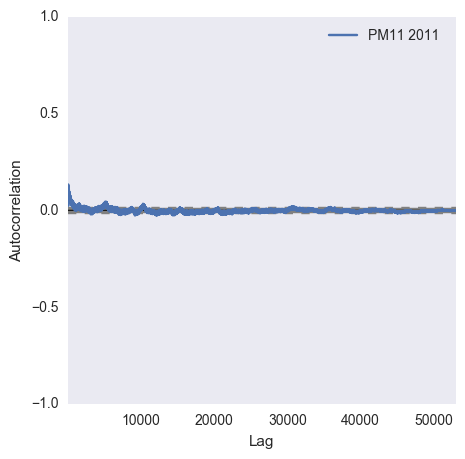

In [637]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date[245983:298983].fillna(0), label='PM11 2011 ')
_ = plt.legend(loc='upper right')


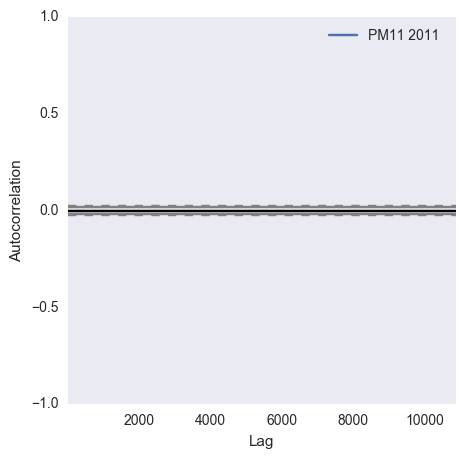

In [641]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date[298984:309853].fillna(0), label='PM11 2011 ')
_ = plt.legend(loc='upper right')

In [584]:
df_indexed_with_date['2011'].size

62650

In [552]:
df_indexed_with_date.PM10['2011'].fillna(0).autocorr(lag=30000) # 2011

nan

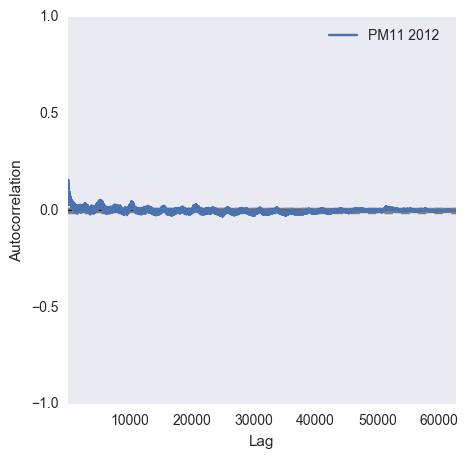

In [517]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2012'].fillna(0), label='PM11 2012 ')
_ = plt.legend(loc='upper right')

In [528]:
df_indexed_with_date.PM10['2012'].fillna(0).autocorr(lag=1000) # 2012

0.0265447083080474

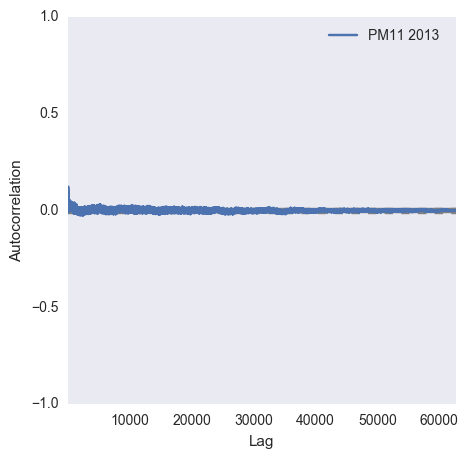

In [518]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2013'].fillna(0), label='PM11 2013 ')
_ = plt.legend(loc='upper right')

In [529]:
df_indexed_with_date.PM10['2013'].fillna(0).autocorr(lag=1000) #2013

0.012251923243151218

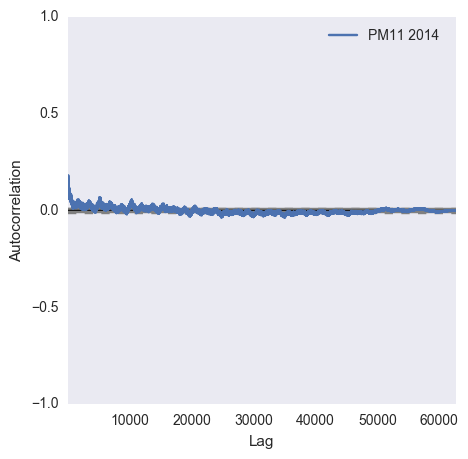

In [519]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2014'].fillna(0), label='PM11 2014 ')
_ = plt.legend(loc='upper right')

In [530]:
df_indexed_with_date.PM10['2014'].fillna(0).autocorr(lag=1000) # 2014

0.028073320531050255

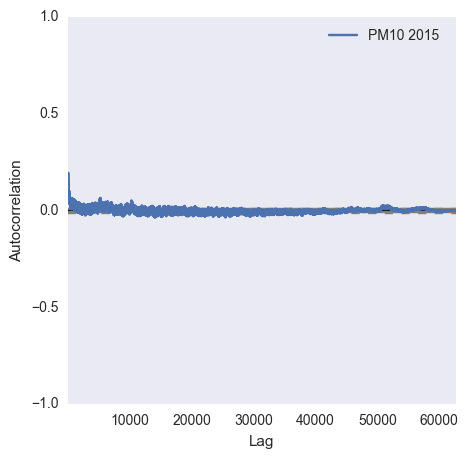

In [521]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2015'].fillna(0), label='PM10 2015 ')
_ = plt.legend(loc='upper right')

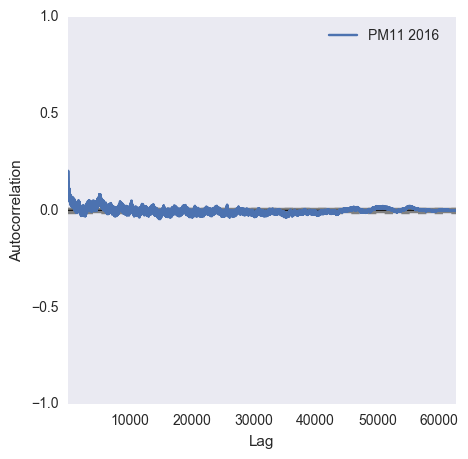

In [522]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2016'].fillna(0), label='PM11 2016 ')
_ = plt.legend(loc='upper right')

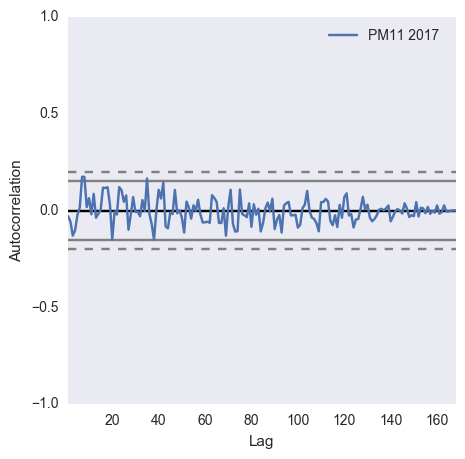

In [523]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2017'].fillna(0), label='PM11 2017 ')
_ = plt.legend(loc='upper right')

In [546]:
df_indexed_with_date.PM10['2017'].fillna(0).autocorr(lag=160)

0.6268592180317214

### ACF for extended between each year 

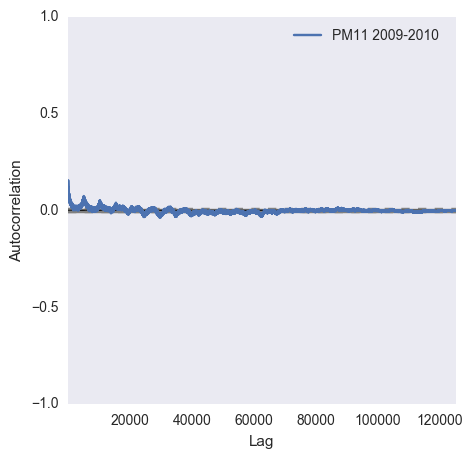

In [648]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2009':'2010'].fillna(0), label='PM11 2009-2010 ')
_ = plt.legend(loc='upper right')

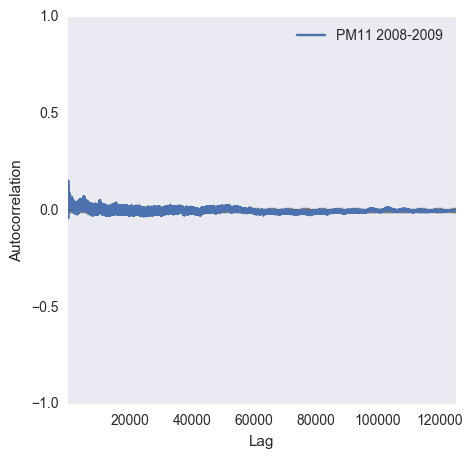

In [650]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2008':'2009'].fillna(0), label='PM11 2008-2009')
_ = plt.legend(loc='upper right')

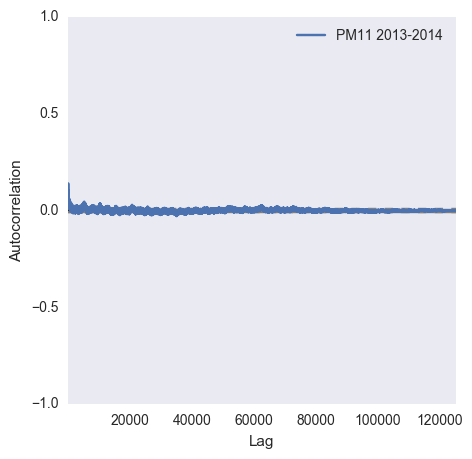

In [651]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2012':'2013'].fillna(0), label='PM11 2013-2014')
_ = plt.legend(loc='upper right')

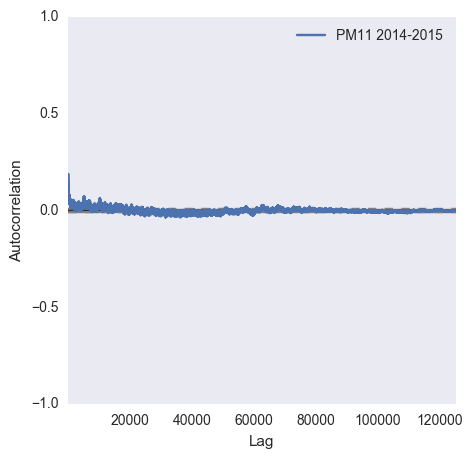

In [652]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2014':'2015'].fillna(0), label='PM11 2014-2015')
_ = plt.legend(loc='upper right')

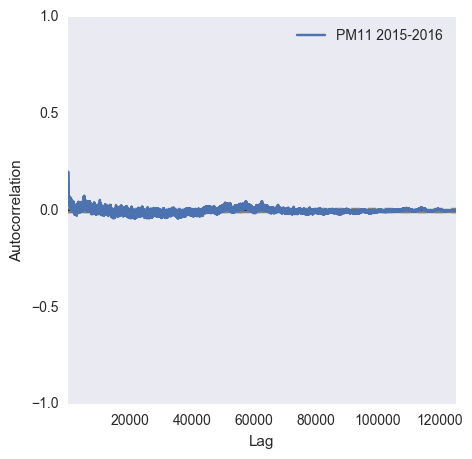

In [653]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2015':'2016'].fillna(0), label='PM11 2015-2016')
_ = plt.legend(loc='upper right')

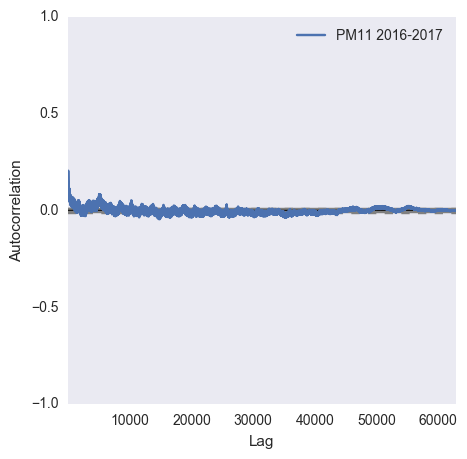

In [654]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2016':'2017'].fillna(0), label='PM11 2016-2017')
_ = plt.legend(loc='upper right')

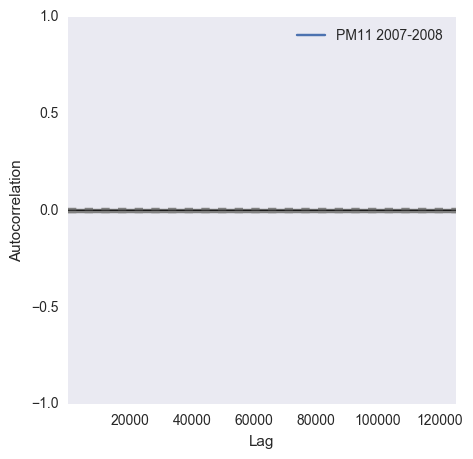

In [655]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2007':'2008'].fillna(0), label='PM11 2007-2008')
_ = plt.legend(loc='upper right')

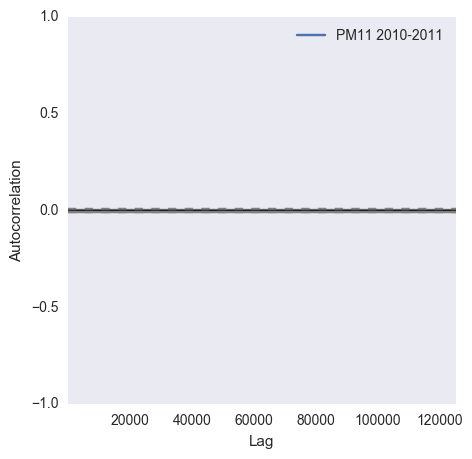

In [656]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2010':'2011'].fillna(0), label='PM11 2010-2011')
_ = plt.legend(loc='upper right')

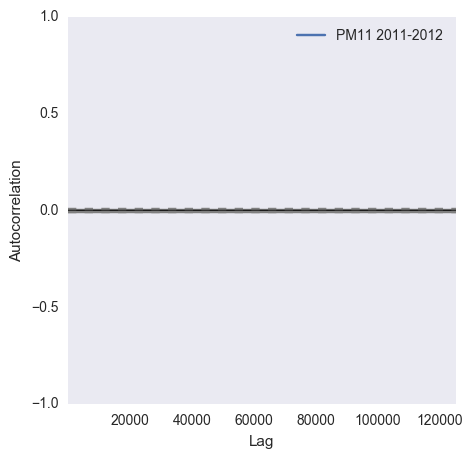

In [657]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)


_ = autocorrelation_plot(df_indexed_with_date['2011':'2012'].fillna(0), label='PM11 2011-2012')
_ = plt.legend(loc='upper right')

In [ ]:
df_indexed_with_date[np.isinf(df_indexed_with_date)].stack().count()

In [455]:
df_indexed_with_date.to_excel("newfile.xlsx") #save file as excel

In [ ]:
df_filled.replace([np.inf, -np.inf], np.nan,inplace=True);